# Water Quality Analysis using Machine Learning

## Importing the Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('water_potability.csv')
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploratory Data Analysis

In [3]:
#Finding if there are any Nan values
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
#Finding the info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
#Couting the total number of rows and columns
dataset.shape

(3276, 10)

In [6]:
#Descriptive statics of the dataset
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
#Filling the missing values
dataset['ph'] = dataset['ph'].fillna(dataset['ph'].mean())
dataset['Sulfate'] = dataset['Sulfate'].fillna(dataset['Sulfate'].mean())
dataset['Trihalomethanes'] = dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].mean())

In [8]:
#Counting 0 and 1 in potability column
dataset['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

## Data Visualization

D:\Anaconda\Anaconda_Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

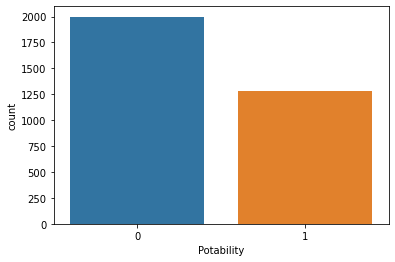

In [9]:
sns.countplot(dataset['Potability'])

## Splitting the dataset into dependent and independent variables

In [10]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [11]:
print(X)

[[7.08079450e+00 2.04890455e+02 2.07913190e+04 ... 1.03797831e+01
  8.69909705e+01 2.96313538e+00]
 [3.71608008e+00 1.29422921e+02 1.86300579e+04 ... 1.51800131e+01
  5.63290763e+01 4.50065627e+00]
 [8.09912419e+00 2.24236259e+02 1.99095417e+04 ... 1.68686369e+01
  6.64200925e+01 3.05593375e+00]
 ...
 [9.41951032e+00 1.75762646e+02 3.31555782e+04 ... 1.10390697e+01
  6.98454003e+01 3.29887550e+00]
 [5.12676292e+00 2.30603758e+02 1.19838694e+04 ... 1.11689462e+01
  7.74882131e+01 4.70865847e+00]
 [7.87467136e+00 1.95102299e+02 1.74041771e+04 ... 1.61403676e+01
  7.86984463e+01 2.30914906e+00]]


In [12]:
print(y)

[0 0 0 ... 1 1 1]


## Splitting the dataset into training and testing

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 112)

In [14]:
print(X_train)

[[7.79845368e+00 1.88394942e+02 3.27045693e+04 ... 1.82724392e+01
  8.51776621e+01 4.10726720e+00]
 [9.57822672e+00 2.05748742e+02 3.30805888e+04 ... 1.69849614e+01
  6.89060880e+01 3.41923876e+00]
 [7.08079450e+00 2.86201763e+02 4.69318843e+04 ... 1.44716503e+01
  7.40438596e+01 4.12093142e+00]
 ...
 [6.17475058e+00 1.38513588e+02 2.15041388e+04 ... 1.42419652e+01
  3.17059331e+01 2.56604879e+00]
 [6.97866426e+00 1.83242796e+02 2.31144461e+04 ... 1.60828475e+01
  6.59957168e+01 4.76694324e+00]
 [3.73012801e+00 2.30299455e+02 1.68928957e+04 ... 1.03421456e+01
  4.70955058e+01 4.94303217e+00]]


In [15]:
print(X_test)

[[5.59672982e+00 2.29295098e+02 4.46523639e+04 ... 1.23618268e+01
  4.04120977e+01 3.82615819e+00]
 [7.08079450e+00 1.72111514e+02 2.65953735e+04 ... 7.87773851e+00
  9.33028160e+01 3.55031114e+00]
 [5.77219739e+00 2.00144971e+02 2.78406942e+04 ... 1.55501014e+01
  6.25212737e+01 3.07898584e+00]
 ...
 [5.59061444e+00 2.29192139e+02 3.53707355e+04 ... 1.32815561e+01
  7.69927158e+01 4.72684502e+00]
 [7.08079450e+00 2.15750221e+02 3.67761375e+04 ... 1.11803496e+01
  6.63962929e+01 4.75431312e+00]
 [7.08079450e+00 1.89814682e+02 1.98877698e+04 ... 1.29589170e+01
  7.09374813e+01 4.89375099e+00]]


In [16]:
print(y_train)

[1 0 1 ... 1 0 0]


In [17]:
print(y_test)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0
 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0
 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 

## Applying Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Kernel SVM model on the Training set

In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[378  30]
 [183  65]]


0.6753048780487805

## Predicitng the result

In [22]:
classifier.predict(sc.transform([[3.716080075,129.4229205,18630.05786,6.635245884,356.8861356,363.2665162,18.4365245,100.3416744
,4.628770537]]))

array([0], dtype=int64)